In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [ ]:
data=pd.read_csv("/content/traffic volume.csv")

In [ ]:
data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [ ]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [ ]:
data.isnull().sum()

,0
holiday,48143
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [ ]:
from collections import Counter
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['rain'].fillna(data['rain'].mean(), inplace=True)
data['snow'].fillna(data['snow'].mean(), inplace=True)

print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


/tmp/ipython-input-23-2110613704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(), inplace=True)
/tmp/ipython-input-23-2110613704.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
data['weather'].fillna('Clouds',inplace=True)

/tmp/ipython-input-24-1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


                    temp      rain      snow   weather  traffic_volume
temp            1.000000  0.009070 -0.019758 -0.033559        0.130034
rain            0.009070  1.000000 -0.000090  0.009542        0.004714
snow           -0.019758 -0.000090  1.000000  0.036662        0.000735
weather        -0.033559  0.009542  0.036662  1.000000       -0.040035
traffic_volume  0.130034  0.004714  0.000735 -0.040035        1.000000


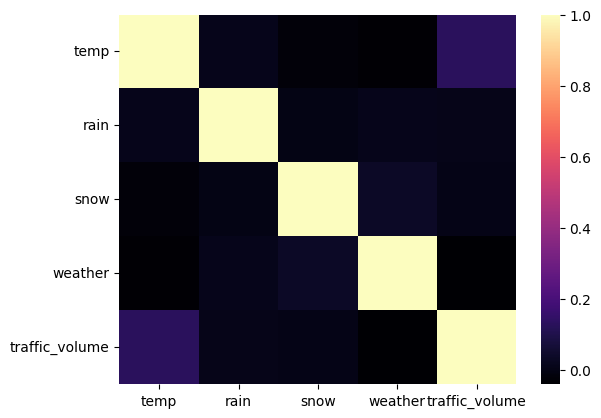

In [ ]:
data['weather'] = data['weather'].astype('category').cat.codes

cor = data[['temp', 'rain', 'snow', 'weather', 'traffic_volume']].corr()

print(cor)

sns.heatmap(cor, annot=False, cmap='magma')
plt.show()

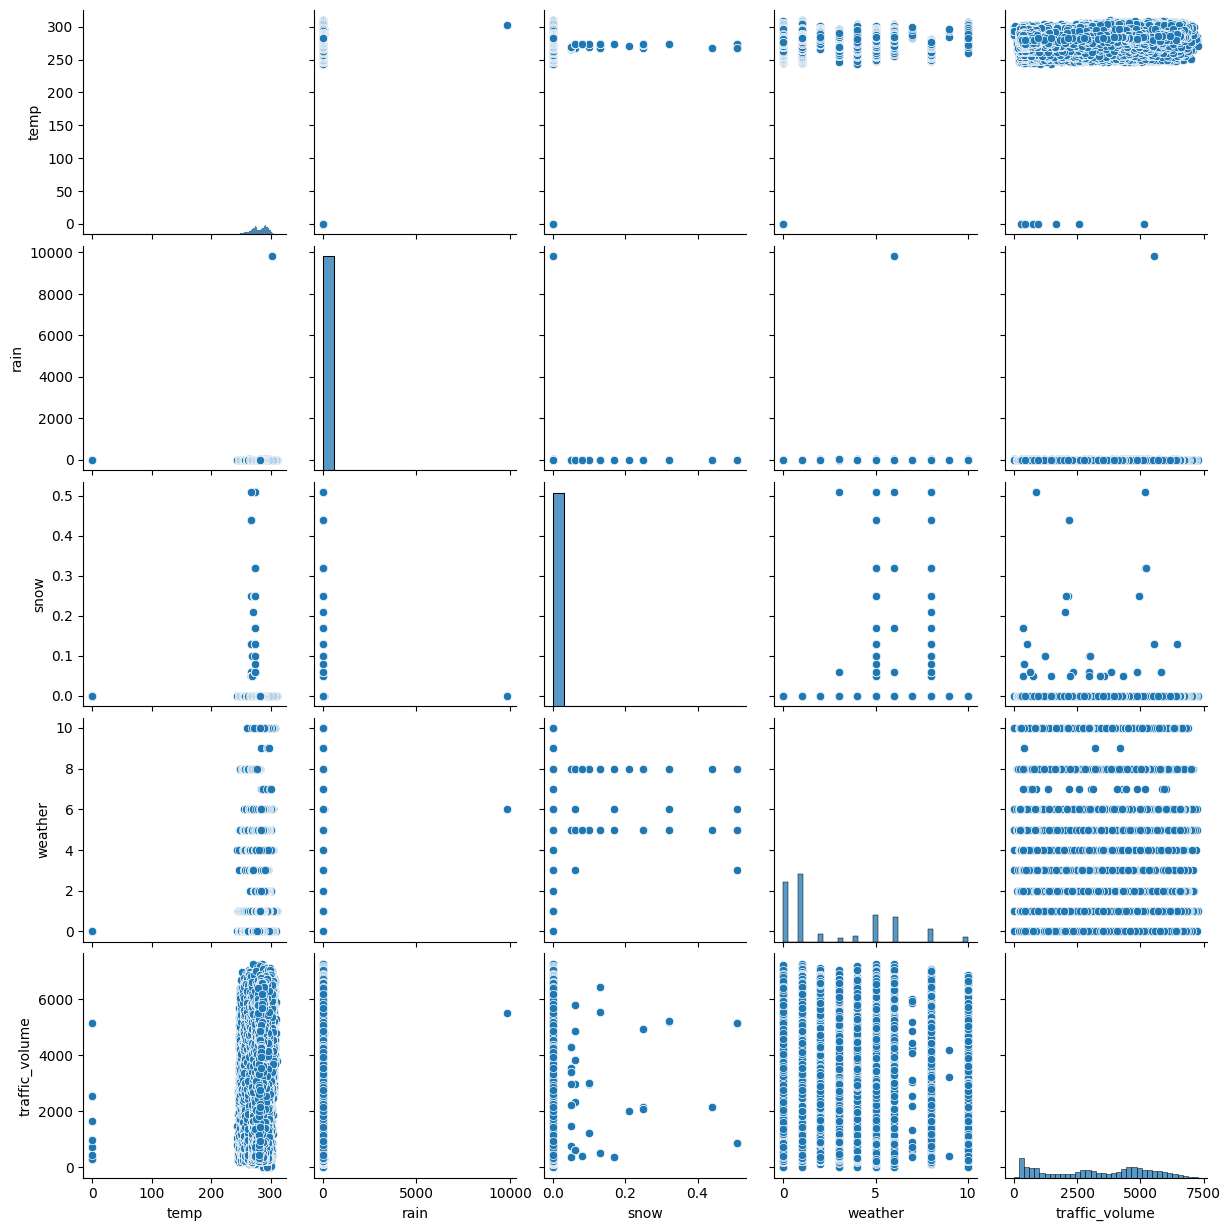

In [ ]:
sns.pairplot(data)

<Axes: >

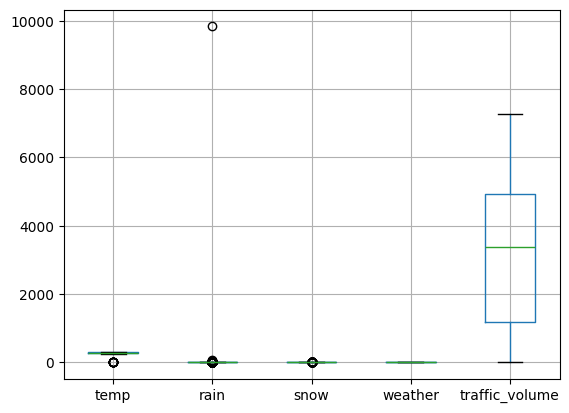

In [ ]:
data.boxplot()

In [ ]:
data[['day', 'month', 'year']] = data['date'].str.split("-", expand=True)

data[['hours', 'minutes', 'seconds']] = data['Time'].str.split(":", expand=True)

data.drop(columns=['date', 'Time'], axis=1, inplace=True)

print(data.head())


  holiday    temp  rain  snow  weather  traffic_volume day month  year hours  \
0     NaN  288.28   0.0   0.0        1            5545  02    10  2012    09   
1     NaN  289.36   0.0   0.0        1            4516  02    10  2012    10   
2     NaN  289.58   0.0   0.0        1            4767  02    10  2012    11   
3     NaN  290.13   0.0   0.0        1            5026  02    10  2012    12   
4     NaN  291.14   0.0   0.0        1            4918  02    10  2012    13   

  minutes seconds  
0      00      00  
1      00      00  
2      00      00  
3      00      00  
4      00      00  


In [ ]:
x=data["traffic_volume"]
x=data.drop(columns=['traffic_volume'],axis=1)

In [ ]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

In [ ]:
names=x.columns

In [ ]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'], axis=1)
#x = pd.get_dummies(x)
names = x.columns
from sklearn.preprocessing import scale
x = scale(x)
x = pd.DataFrame(x, columns=names)
print(x.head())


   holiday      temp      rain      snow   weather       day    month  \
0      0.0  0.530485 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
1      0.0  0.611467 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
2      0.0  0.627964 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
3      0.0  0.669205 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
4      0.0  0.744939 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   

       year     hours  minutes  seconds  
0 -1.855294 -0.345548      0.0      0.0  
1 -1.855294 -0.201459      0.0      0.0  
2 -1.855294 -0.057371      0.0      0.0  
3 -1.855294  0.086718      0.0      0.0  
4 -1.855294  0.230807      0.0      0.0  


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =0)

In [ ]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
xgb=xgboost.XGBRegressor()

In [ ]:
lin_reg.fit(x_train,y_train)
print("Linear Regression model fitted.")
Dtree.fit(x_train,y_train)
print("Decision Tree model fitted.")
Rand.fit(x_train,y_train)
print("Random Forest model fitted.")
svr.fit(x_train,y_train)
print("SVR model fitted.")
xgb.fit(x_train,y_train)
print("XGBoost model fitted.")

print("\nAll models fitted successfully.")

Linear Regression model fitted.
Decision Tree model fitted.
Random Forest model fitted.
SVR model fitted.
XGBoost model fitted.

All models fitted successfully.


In [ ]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=xgb.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-7.514730475589078
-0.9490620969262415
-1.1750736685967085
-16.714838554591285
-1.1573107242584229


In [ ]:
p2=Dtree.predict(x_test)

In [ ]:
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=xgb.predict(x_test)

In [ ]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-7.514730475589078
-0.9490620969262415
-1.1750736685967085
-16.714838554591285
-1.1573107242584229


In [ ]:
MSE=metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE)

np.float64(2655.2263062469046)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['holiday'] = le.fit_transform(data['holiday'])
import pickle
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le, open("encoder.pkl", 'wb'))

